[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SLCFLAB/Data-Science-Python/blob/main/Day%207/7_1.visualization_with_titanic.ipynb)

# Part 1: Visualization with Titanic Dataset

Welcome to the first part of today's lab session. In this part, you will be practicing some basic data visualization techniques with the famous 'Titanic Dataset'. Hope you enjoy!    

Copyright (c) 2022 Seungju Lee (이승주)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare Data

The 'Titanic Dataset' has been a **go-to dataset** for ML begineers. For this session, we will practice basic data visualization techniques with this famous dataset.     

Feel free to check Kaggle's Titanic ML Competition website: https://www.kaggle.com/competitions/titanic/overview

In [3]:
# You can simply use seaborn's built-in method to load the dataset
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Column info:
* survived: Survival(0 = No, 1 = Yes)
* pclass: Ticket Class (1 = 'First', 2 = 'Second', 3 = 'Third')
* sex: Sex
* age: Age in years
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* fare: Passenger fare
* embarked: Port of embarkation (C = 'Cherbourg', Q = 'Queenstown', S = 'Southampton')
* class: Same info with 'pclass' but in Categorical form
* who: Age + Sex
* adult_male: Same info with 'sex' but in Boolean form
* deck: Passenger deck
* embark_town: Same info with 'embarked' but each city in its full name
* alive: Same info with 'survived' but in text form
* alone: Whether the passenger was aboard alone

## Data Inspection and Preprocessing

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Since deck column has too many null values, let's drop it for this time
titanic.drop('deck', axis=1, inplace=True)

In [7]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [8]:
# And just let's drop all rows which contains NaN values
titanic = titanic.dropna().reset_index(drop=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
708,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
709,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
710,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [10]:
# pprint is a module that makes printed output more interpretable
from pprint import pprint

In [11]:
for col in list(titanic.columns):
    pprint(col)
    if col not in 'age, fare'.split(', '):
        pprint(titanic[col].unique())
    else:
        print("Too many values...")
    print('-'*10)

'survived'
array([0, 1])
----------
'pclass'
array([3, 1, 2])
----------
'sex'
array(['male', 'female'], dtype=object)
----------
'age'
Too many values...
----------
'sibsp'
array([1, 0, 3, 4, 2, 5])
----------
'parch'
array([0, 1, 2, 5, 3, 4, 6])
----------
'fare'
Too many values...
----------
'embarked'
array(['S', 'C', 'Q'], dtype=object)
----------
'class'
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
----------
'who'
array(['man', 'woman', 'child'], dtype=object)
----------
'adult_male'
array([ True, False])
----------
'embark_town'
array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)
----------
'alive'
array(['no', 'yes'], dtype=object)
----------
'alone'
array([False,  True])
----------


In [12]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Visualization with Categorical Variables

Let's first take a look at the number of passengers for each ticket class

### Bar Chart

In [14]:
pclass_counts = titanic.pclass.value_counts()
pclass_counts

3    355
1    184
2    173
Name: pclass, dtype: int64

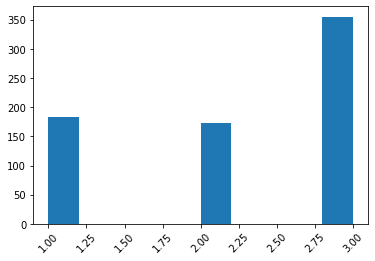

In [18]:
# Using pandas dataframe's built-in method
# titanic.pclass.hist()
titanic['pclass'].hist(grid=False, xrot=45)


With matplotlib, you can customize the visualization output to make it more interpretable

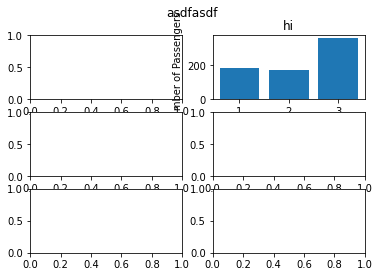

In [23]:
fig, ax = plt.subplots(3,2)
fig.suptitle("asdfasdf")
ax[0,1].set_title("hi")
ax[0,1].bar(list(pclass_counts.keys()), list(pclass_counts.tolist()))
ax[0,1].set_xticks([1,2,3])
ax[0,1].set_xlabel('Class of Passengers')
ax[0,1].set_ylabel('Number of Passengers')
plt.show()

Let's use seaborn instead

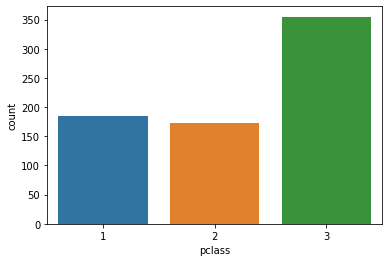

In [24]:
sns.countplot(x = 'pclass', data = titanic)
plt.show()

Now you can see, seaborn offers some convenient and user-friendly options.    
Of course, many people still use matplotlib.pyplot for visualization but you have to make many configurations to make the visualization in a format that you want.    
This process is somewhat troublesome task but I would say that this customizability is what makes matplotlib still an attractive package to use.

Let's add gender information for this viz

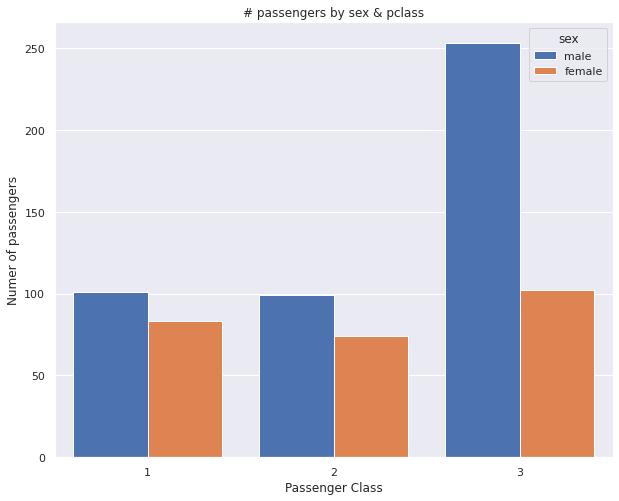

In [26]:
# You can even set style with seaborn
sns.set_theme(style = 'darkgrid')

# change figure size
plt.figure(figsize=(10,8))

ax = sns.countplot(x = 'pclass', hue = 'sex', data = titanic)
ax.set(xlabel = 'Passenger Class', ylabel = 'Numer of passengers', title = '# passengers by sex & pclass')

plt.show()

### Horizontal Bar Chart

You can swap the axes for bar chart.

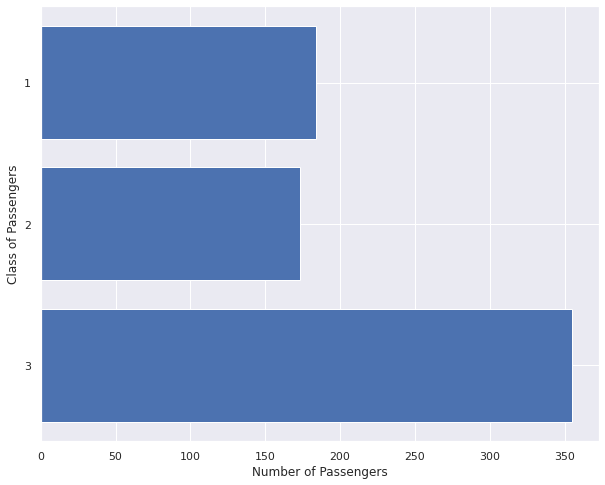

In [27]:
fig, ax = plt.subplots()

fig.set_size_inches(10,8)
ax.barh(list(pclass_counts.keys()), list(pclass_counts.values))
ax.invert_yaxis()
ax.set_yticks([1,2,3])
ax.set_ylabel('Class of Passengers')
ax.set_xlabel('Number of Passengers')
plt.show()

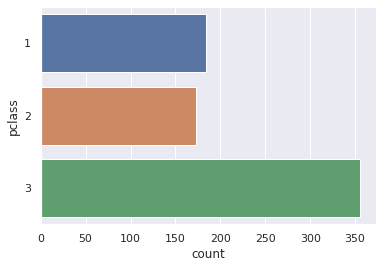

In [30]:
sns.set_color_codes('bright')

# to make it horizontal simply change x to y
sns.countplot(y = 'pclass', data = titanic)
plt.show()

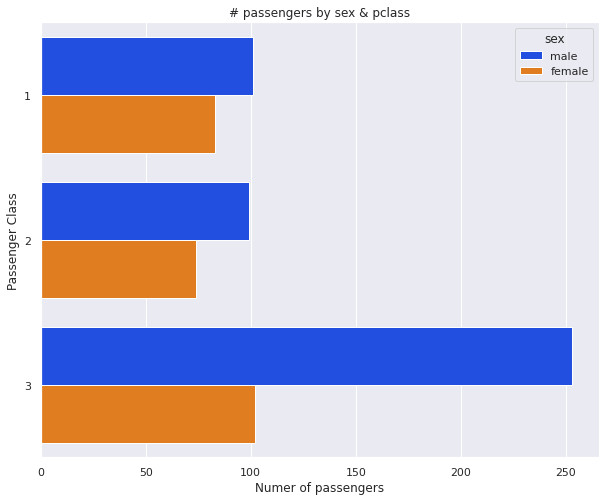

In [38]:
# You can even set style with seaborn
sns.set_theme(style = 'darkgrid')

# change figure size
plt.figure(figsize=(10,8))

# let's use different palette
ax = sns.countplot(y = 'pclass', hue = 'sex', data = titanic, palette='bright')
ax.set(xlabel = 'Numer of passengers', ylabel = 'Passenger Class', title = '# passengers by sex & pclass')

plt.show()

You can even stack bars with dodge option

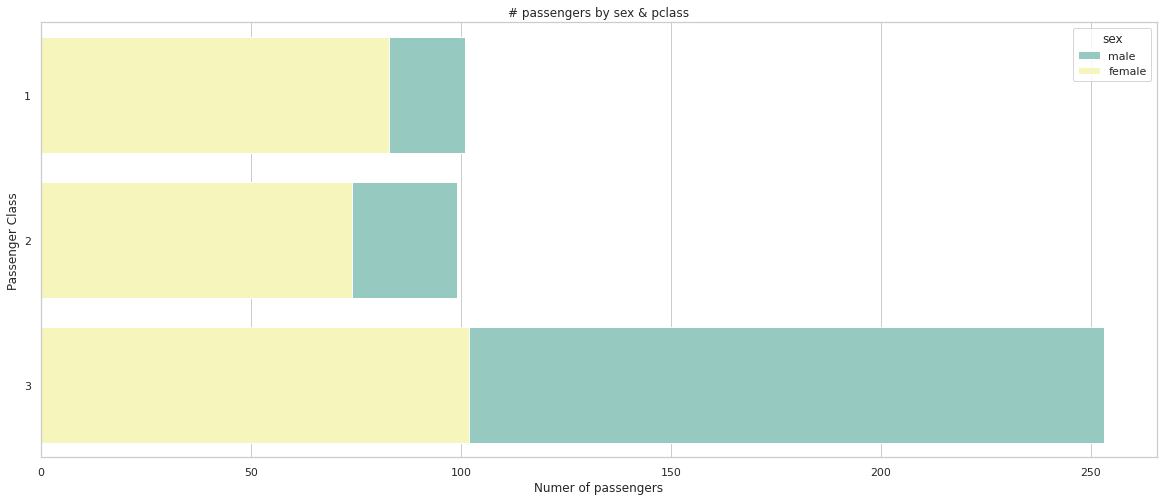

In [39]:
# You can even set style with seaborn
sns.set_theme(style = 'whitegrid')

# change figure size
plt.figure(figsize=(20,8))

# dodge option is added to make it as a stacked horizontal bar chart
ax = sns.countplot(y = 'pclass', hue = 'sex', data = titanic, dodge=False, palette='Set3')

ax.set(xlabel = 'Numer of passengers', ylabel = 'Passenger Class', title = '# passengers by sex & pclass')

plt.show()

### Pie Chart

In [40]:
pclass_counts

3    355
1    184
2    173
Name: pclass, dtype: int64

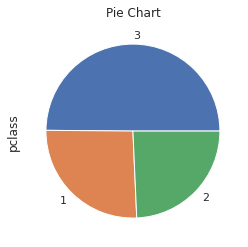

In [43]:
pclass_counts.plot(kind='pie', title = 'Pie Chart')
plt.show()

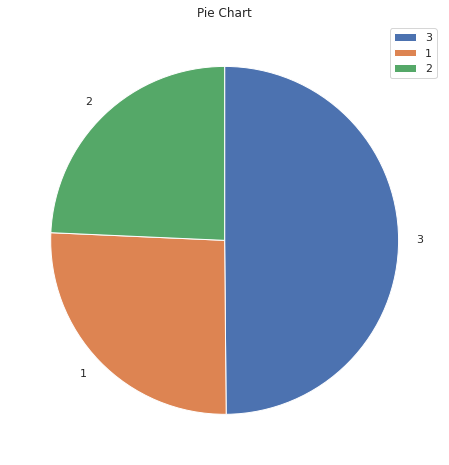

In [47]:
fig, ax = plt.subplots()
ax[0,0]
ax[0,1]
fig.set_size_inches(8,8)
ax.pie(list(pclass_counts.values), labels = list(pclass_counts.keys()), startangle = 90, counterclock = False)
ax.set_title('Pie Chart')
plt.legend()
plt.show()

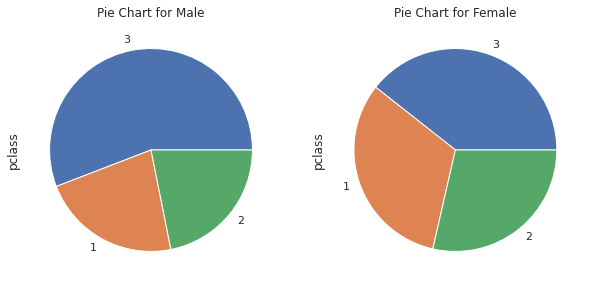

In [49]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
titanic.loc[titanic.sex=='male'].pclass.value_counts().plot(kind='pie', title='Pie Chart for Male')

plt.subplot(1,2,2)
titanic.loc[titanic.sex=='female'].pclass.value_counts().plot(kind='pie', title='Pie Chart for Female')
plt.show()

There's no particular method for pie chart in seborn so it's better to use matplotlib and only use seaborn's color theme

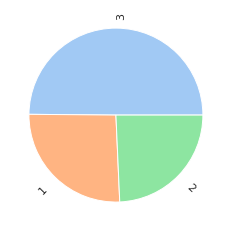

In [51]:
plt.pie(pclass_counts.values, labels=[3, 1, 2], colors = sns.color_palette('pastel')[:3], shadow=False, rotatelabels=True)
plt.show()

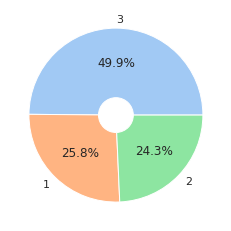

In [53]:
# You can make it into donut shape instead of full circle and add percentage label
plt.pie(pclass_counts.values, labels=[3, 1, 2], colors = sns.color_palette('pastel')[:3], autopct='%1.1f%%', 
        wedgeprops=dict(width=.8))
plt.show()

## Visualization with Continuous Variables

### Histogram

Histogram is the most basic visualization method you can think of for continuous variables. It's really simple!

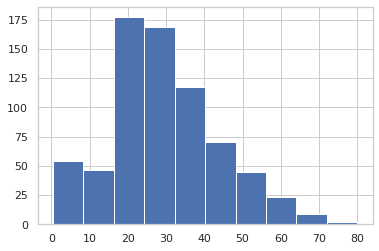

In [54]:
titanic.age.hist()
None

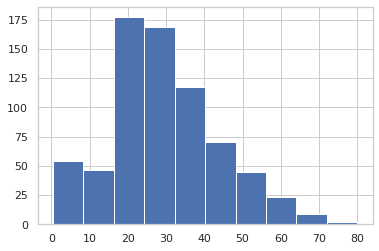

In [55]:
# Of course you can use matplotlib
plt.hist(titanic.age)
plt.show()

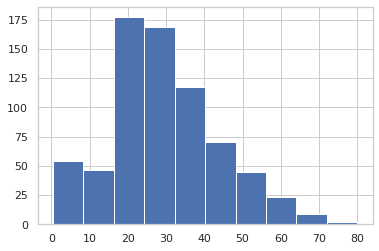

In [57]:
# You can change bins with 'bins' option
plt.hist(titanic.age, bins = 10)
plt.show()

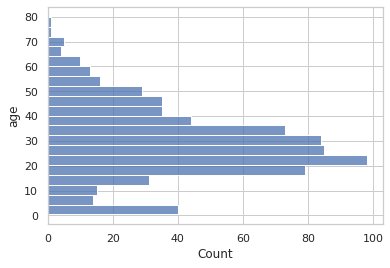

In [59]:
sns.histplot(data = titanic, y = 'age')
plt.show()

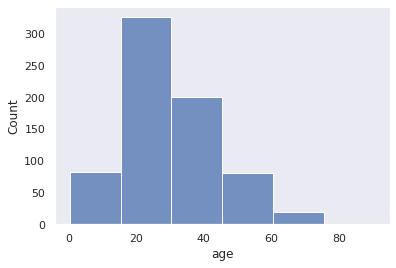

In [61]:
sns.set_style('dark')

# you can add binwidth option to control the width for xlabel
sns.histplot(data = titanic, x = 'age', binwidth = 15)
plt.show()

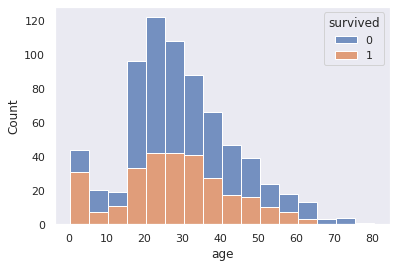

In [64]:
# Of course you can add hue and stack
sns.histplot(data = titanic, x = 'age', hue = 'survived', binwidth = 5, multiple='stack')
plt.show()

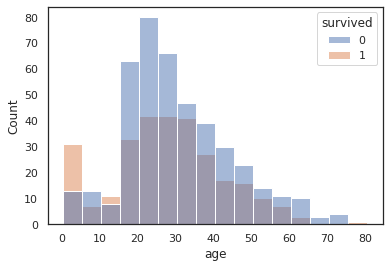

In [65]:
# You can use other 'multiple' options
sns.set_style('white')
sns.histplot(data = titanic, x = 'age', hue = 'survived', binwidth = 5, multiple='layer')
plt.show()

### Density Plot

Sometimes you may want to check the distribution of values. Density plot is the right option for this occasion!

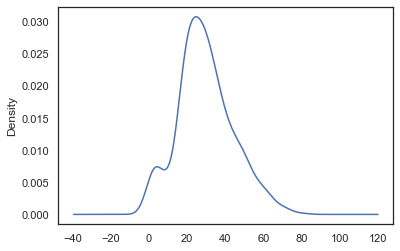

In [ ]:
titanic.age.plot(kind='density')
None

How about using seaborn?

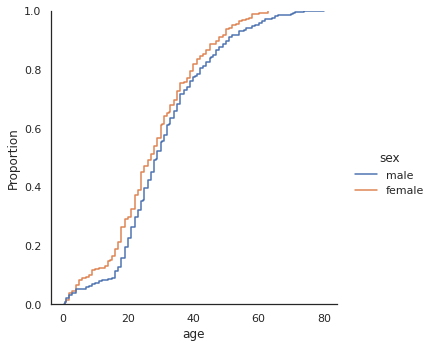

In [68]:
sns.displot(data=titanic, x='age', hue='sex', kind='ecdf')
plt.show()

### Stripplot, Violinplot, etc...

This is where seaborn dominates matplotlib. Seaborn offers so many plotting options for continuous variable. Let's take a look

#### Stripplot

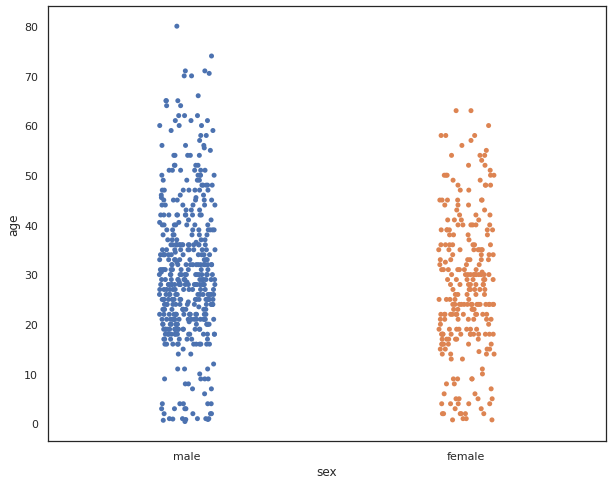

In [69]:
plt.figure(figsize=(10,8))
sns.stripplot(data=titanic, x='sex', y='age')
plt.show()

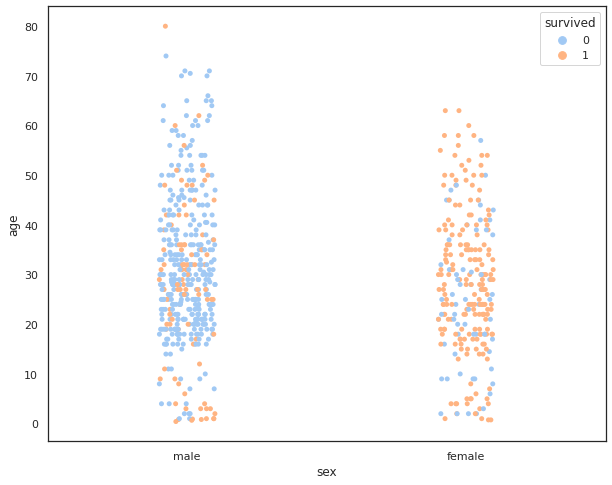

In [72]:
plt.figure(figsize=(10,8))
sns.stripplot(data=titanic, x='sex', y='age', hue='survived', palette='pastel', dodge=False)
plt.show()

#### Boxplot

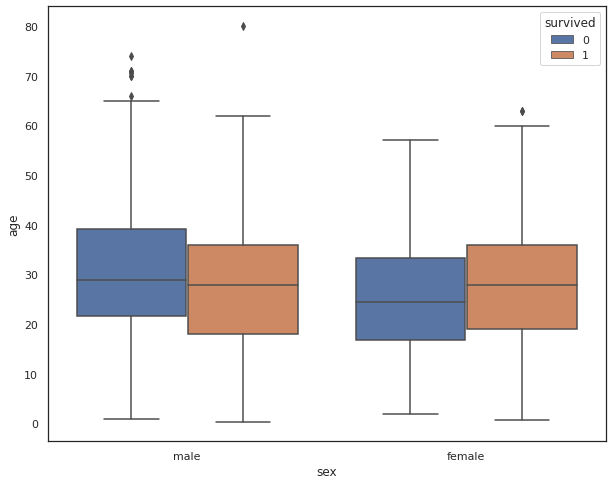

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(data=titanic, x='sex', y='age', hue = 'survived')
plt.show()

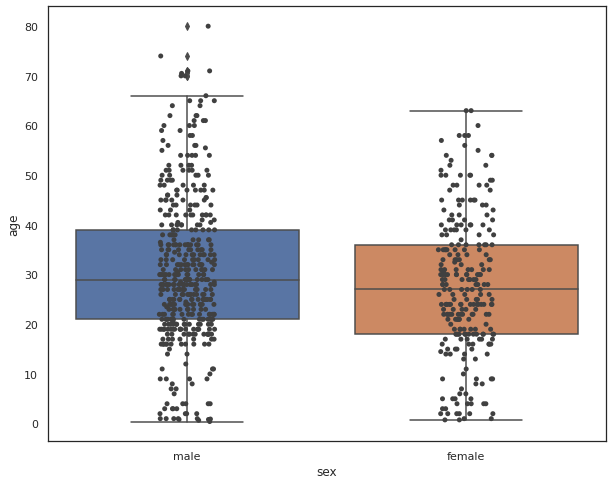

In [75]:
# You can even combine two plots!
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=titanic, x='sex', y='age')
ax = sns.stripplot(data=titanic, x='sex', y='age', color='.25')
plt.show()

#### Violinplot

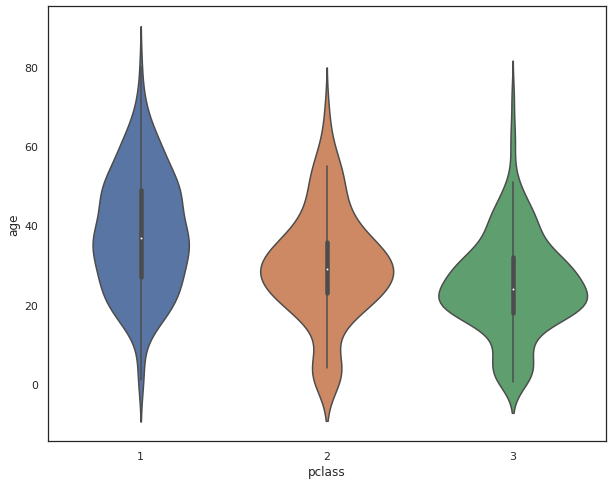

In [76]:
plt.figure(figsize=(10,8))
sns.violinplot(data=titanic, x = 'pclass', y = 'age')
plt.show()

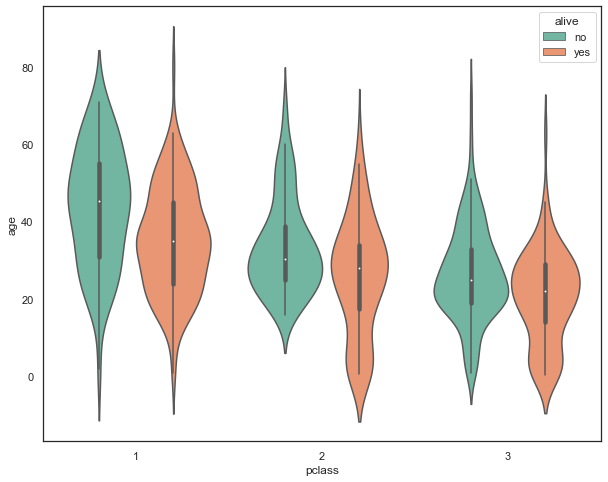

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(data=titanic, x = 'pclass', y = 'age', hue = 'alive', palette='Set2')
plt.show()

## What else you can do?

Other than the examples above, create your own visualization of Titanic and share it with classmates. (You can use other python libraries if you want. I highly recommend you to practice plotly!)

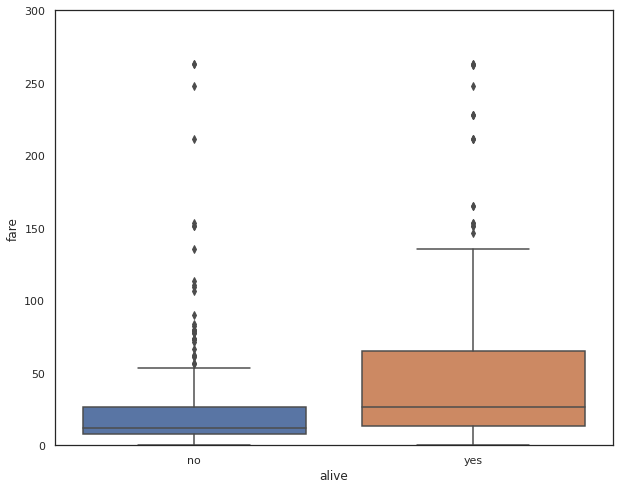

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(data=titanic, x='alive', y='fare')
plt.ylim(0,300)
plt.show()

In [79]:
!pip install plotly

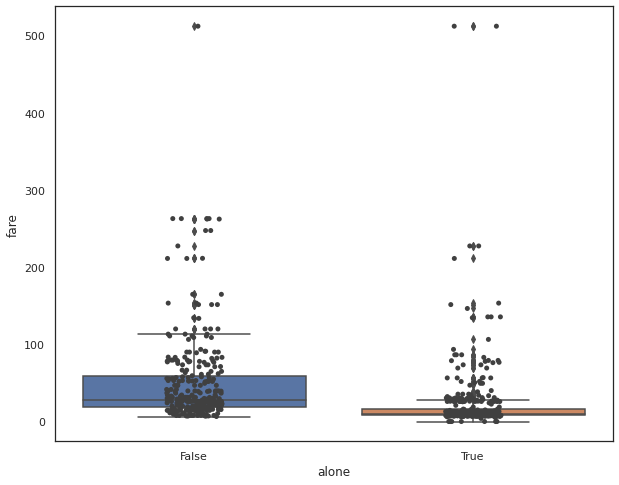

In [80]:
# You can even combine two plots!
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=titanic, x='alone', y='fare')
ax = sns.stripplot(data=titanic, x='alone', y='fare', color='.25')
plt.show()

No handles with labels found to put in legend.


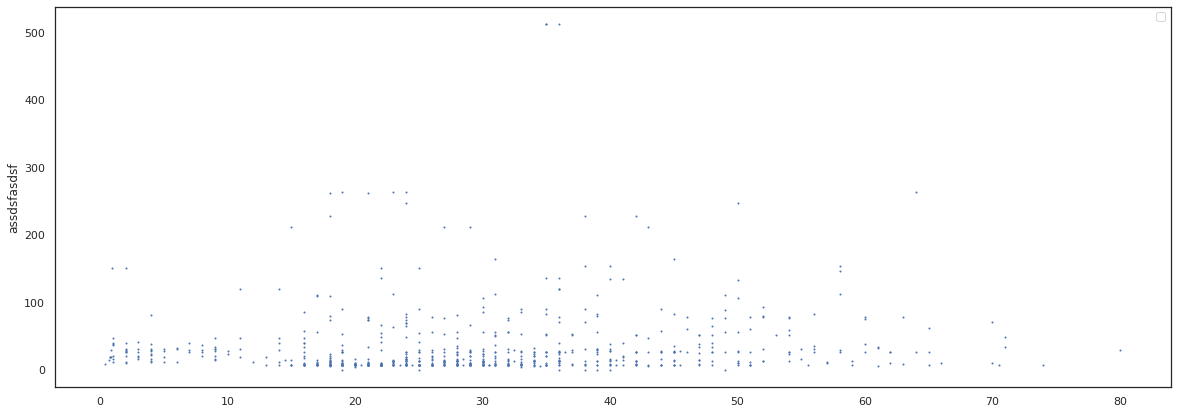

In [90]:
plt.figure(figsize=(20,7))
plt.scatter(titanic['age'], titanic['fare'],s=1)
plt.ylabel(
    "assdsfasdsf"
)
plt.legend()